4.5/ Viết chương trình tạo ra 1 ANN gồm 1 lớp ẩn có 5 node, 

tất cả các node trong mạng đều có activation function là tanh(x)/relu(x) /sigmoid(x) 

và lớp out có activation là relu(x)/tanh(x)/sigmoid(x)/pureline(x). 

Huấn luyện mạng ANN để học quan hệ y = x^2 (hoặc y = sin(x))


In [56]:
import numpy as np
def ReLU(x):
    return np.maximum(0, x)

In [57]:

class myann:
    def __init__(self, inum, hidnum, onum):
        self.w1 = np.random.random((hidnum, inum + 1)) - .5
        self.w2 = np.random.random((onum, hidnum + 1)) - .5

    def feedforward(self, X):
        x1 =np.hstack((X, np.array([1])))
        self.x1 = x1
        a1 = self.w1 @ x1
        self.a1 = a1
        z1 = ReLU(a1)

        z1 = np.hstack((z1, np.array([1])))
        a2 = self.w2 @ z1
        self.z1 = z1
        z2 = a2
        return z2
    
    def train(self, X, t, epoch):
        lr = 0.01
        for _ in range(epoch):
            for i in range(X.shape[0]):
                input = X[i]
                y = self.feedforward(input)
                D2 = y - t[i]
                GD2 = (np.array([D2])).T @ (np.array([self.z1]))
                self.w2 =self.w2 - lr * GD2

                D1_temp = D2 @ self.w2
                D1 = D1_temp[0 : -1] * (self.a1>0)
                GD1 = (np.array([D1])).T @ (np.array([self.x1]))
                self.w1 = self.w1 - lr * GD1


ann = myann(2,5,1)
out = ann.feedforward(np.array([3,2]))
print('out',out)

ann.train(np.array([[3,2]]), np.array([2]),100)
out = ann.feedforward(np.array([3,2]))
print('out',out)

out [0.83166575]
out [1.99999999]


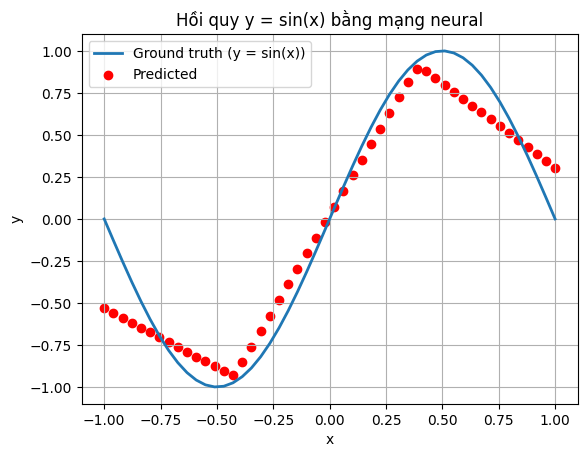

In [58]:
import matplotlib.pyplot as plt
X = np.linspace(-1, 1, 50).reshape(-1, 1)
Y = np.sin(np.pi*X)

# Tạo và huấn luyện mạng
ann = myann(1, 10, 1)
ann.train(X, Y, epoch=200)

# Dự đoán
Y_pred = np.array([ann.feedforward(x) for x in X])

# Vẽ biểu đồ
plt.plot(X, Y, label='Ground truth (y = sin(x))', linewidth=2)
plt.scatter(X, Y_pred, color='red', label='Predicted')

plt.title("Hồi quy y = sin(x) bằng mạng neural")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()